In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import scipy as sp
import numpy as np
from scipy import interpolate
from IPython.display import display
%matplotlib inline
#%config InlineBackend.close_figures = False
from scipy.io.idl import readsav
import forwardmodel

In [6]:
obspec = np.asfortranarray(np.loadtxt("2M2224_multi.txt",dtype='d',unpack='true'))
spexobs = np.where(obspec[0,:] < 2.5)
print spexobs
                           

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [7]:
wlgrid = obspec[0,:]
delta1=wlgrid-np.roll(wlgrid,1)

delta2=np.abs(wlgrid-np.roll(wlgrid,-1))

delta=0.5*(delta1+delta2)


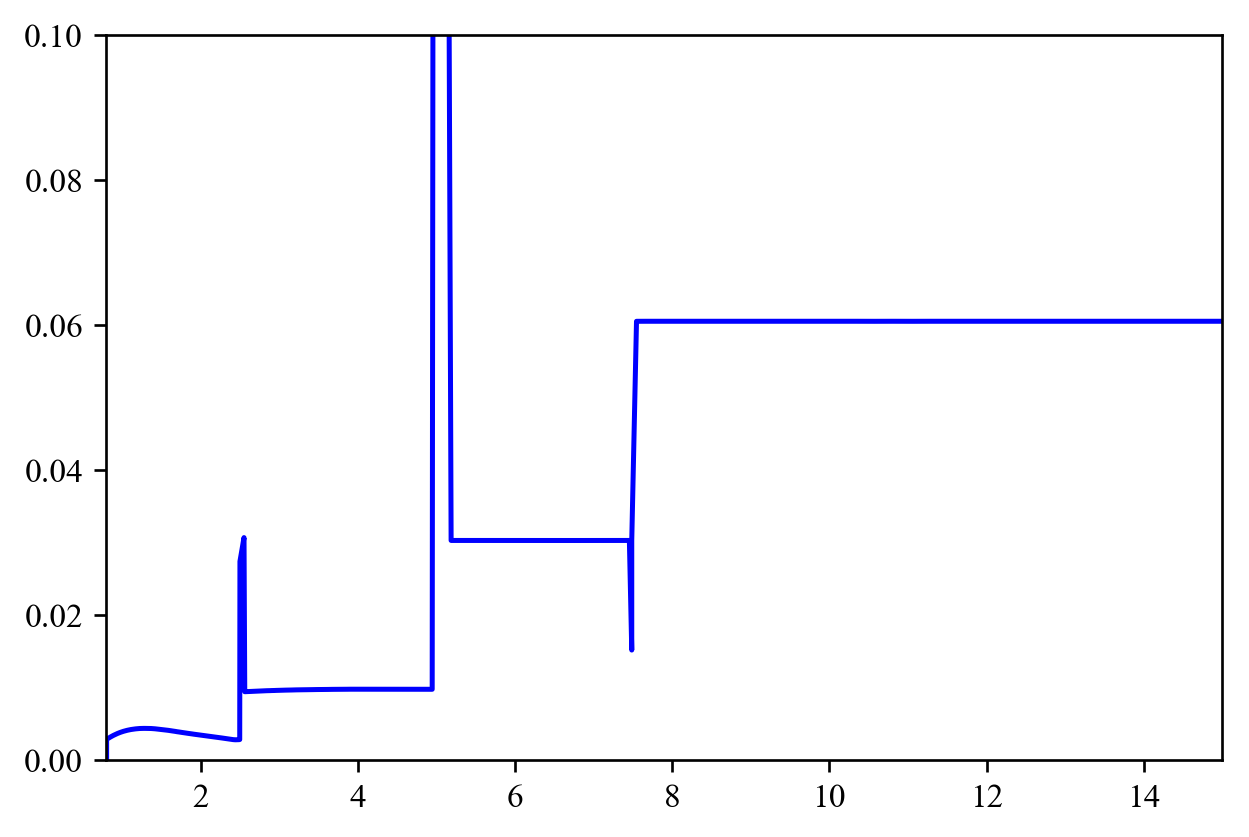

In [10]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=240)
plt.axis([0.8, 15., 0.0,0.1])
plt.plot(obspec[0,:],delta,'b-')

In [2]:
intemp = np.loadtxt("16temps.dat",dtype='f')
#intemp = np.full(16,1000.,dtype='d')
inlayer = np.arange(0,15.25,1)  
layer = np.arange(0,15.25,0.25)
tfit = interpolate.splrep(inlayer,intemp,s=0)
temp = np.asfortranarray(interpolate.splev(layer,tfit, der=0),dtype='d')
w1 = 1.0
w2 = 10.0
logg = 4.5
R2D2 = 1
gasnum = np.asfortranarray(np.array([1,2],dtype='i'))
print temp

[ 1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.]


In [3]:
VMR1 = np.full((61,),(-3.45)) # water
vmr2 = np.full((61,),(-3.4)) # ch4
#vmr3 = np.full((61,),(-8.))  # K
#print VMR1.shape
logVMR = np.reshape((VMR1,vmr2),(2,61))

In [4]:
pcover = 1.0
do_clouds = 0
cloudnum = np.array([1],dtype='i')
#cloudname = np.reshape((cname),(1,1))
cloudrad = np.full((1,61,1),1e-4)
cloudsig = np.full((1,61,1),1e-5)
cloudprof = np.full((1,61,1),0.0)
nwave = 319188

In [ ]:
outspec = forwardmodel.marv(w1,w2,temp,logg,R2D2,gasnum,logVMR,pcover,do_clouds,cloudnum,cloudrad,cloudsig,cloudprof)

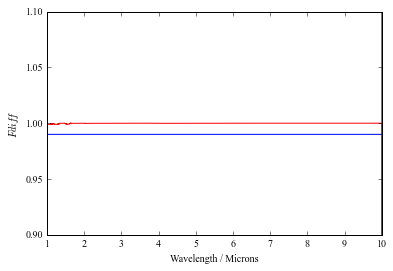

In [6]:
B = np.empty(nwave,dtype='d') 
B = 3.14159274*((2.*6.62606957e-34*(2.99792458e8**2.)) / ((outspec[0,:]*1.e-6)**5.)) / ((np.exp((6.62606957e-34*2.99792458e8)/(outspec[0,:]*1e-6*1.3806488e-23*1000.)))-1.) * 1.e-6
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([1.0, 10., 0.9,1.1])
plt.plot(outspec[0,:],(outspec[1,:] / B),'r-')
plt.plot(outspec[0,:],B,'b-')
plt.plot(outspec[0,:],outspec[1,:],'g-')
plt.plot(outspec[0,:],np.full(nwave,0.99),'b-')

#plt.plot(outspec[0,:],6.666*outspec[1,:],'b-')
plt.ylabel(r'$Fdiff$')
plt.xlabel('Wavelength / Microns')

#asp = 10 / 3.5

#plt.axes().set_aspect(asp)
plt.savefig('testspec.pdf',format='pdf', dpi=720)

In [13]:
outspec =  outspec[:,np.logical_not(np.logical_or(outspec[0,:] > w2, outspec[0,:] < w1))]
wlen = outspec.shape[1]
wint = outspec[0,0] - outspec[0,wlen-1]
disp = wint / wlen
fwhm = 0.005
gwidth = int(round(fwhm / disp))

In [8]:
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import Gaussian1DKernel


In [9]:
gauss = Gaussian1DKernel(gwidth)
cspec = convolve(outspec[1,:],gauss,boundary='extend')
spec = np.array([outspec[0,:],cspec])

In [10]:
print spec.shape
print outspec.shape

(2, 94001)
(2, 94001)


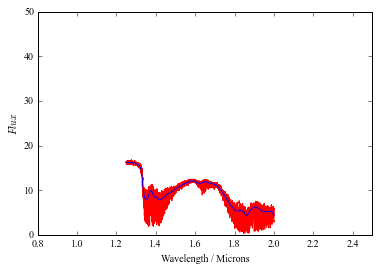

In [11]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0.8, 2.5, 0.,50])
plt.plot(outspec[0,:],outspec[1,:],'r-')
plt.plot(spec[0,:],spec[1,:],'b-')
plt.ylabel(r'$Flux$')
plt.xlabel('Wavelength / Microns')


In [12]:
# now rebin
from pysynphot import observation
from pysynphot import spectrum
wavenew = np.arange(w1,w2,0.0015,dtype='f')
ispec = spectrum.ArraySourceSpectrum(wave=spec[0,:], flux=spec[1,:])
f = np.ones(len(spec[0,:]))
filt = spectrum.ArraySpectralElement(spec[0,:], f, waveunits='microns')
obs = observation.Observation(ispec, filt, binset=wavenew, force='taper')

/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:14: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:74: UserWarning: Extinction files should be moved to $PYSYN_CDBS/extinction for compatibility with future versions of pysynphot.
  warnings.warn('Extinction files should be moved to '
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:110: UserWarning: Extinction files not found in grid/extinction
  warnings.warn('Extinction files not found in %s' % (extdir,))
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:88: UserWarning: PYSYN_CDBS is undefined; cannot find mtab/*_tmg.fits file
  warnings.warn("PYSYN_CDBS is undefined; cannot find %s file" % template)
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/location

In [14]:
unc = np.max(obs.binflux)
error = np.full(500,unc/50)
outflux = np.ones(500)
outflux = obs.binflux + error*np.random.randn(500)
    

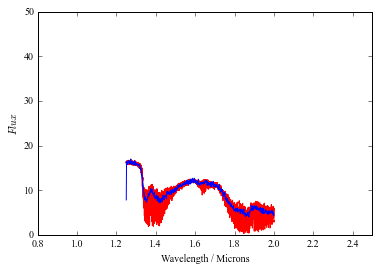

In [15]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0.8, 2.5, 0.,50])
plt.plot(outspec[0,:],outspec[1,:],'r-')
plt.plot(spec[0,:],spec[1,:],'b-')
plt.plot(wavenew,outflux,'b-')
plt.ylabel(r'$Flux$')
plt.xlabel('Wavelength / Microns')


In [16]:
np.savetxt('sim_spectrum.dat', np.c_[wavenew,outflux,error])

In [69]:
gwidth = 4
if (gwidth % 2 == 0):
    gwidth = gwidth + 1

In [70]:
print gwidth

5


In [9]:
theta = [-3.45, -3.40]
fixvmr = -8.

In [15]:
test = np.array([theta[0],theta[1], fixvmr]).reshape(3,)
print test

[-3.45 -3.4  -8.  ]
